In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.preprocessing import StandardScaler

from matplotlib.ticker import MaxNLocator


# Filter out import warnings
warnings.filterwarnings("ignore", category=ImportWarning)

In [40]:
df = pd.read_csv('data/data.csv')
numeric_columns = df.reindex(columns=['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew_Point', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT'])
data_types = numeric_columns.dtypes


In [41]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
non_numeric_encoded = pd.get_dummies(df[non_numeric_columns])
non_numeric_encoded

,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_YX,TAIL_NUM_N101DU,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28816,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28817,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28818,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
numeric_columns['Dew_Point'].dtype

dtype('O')

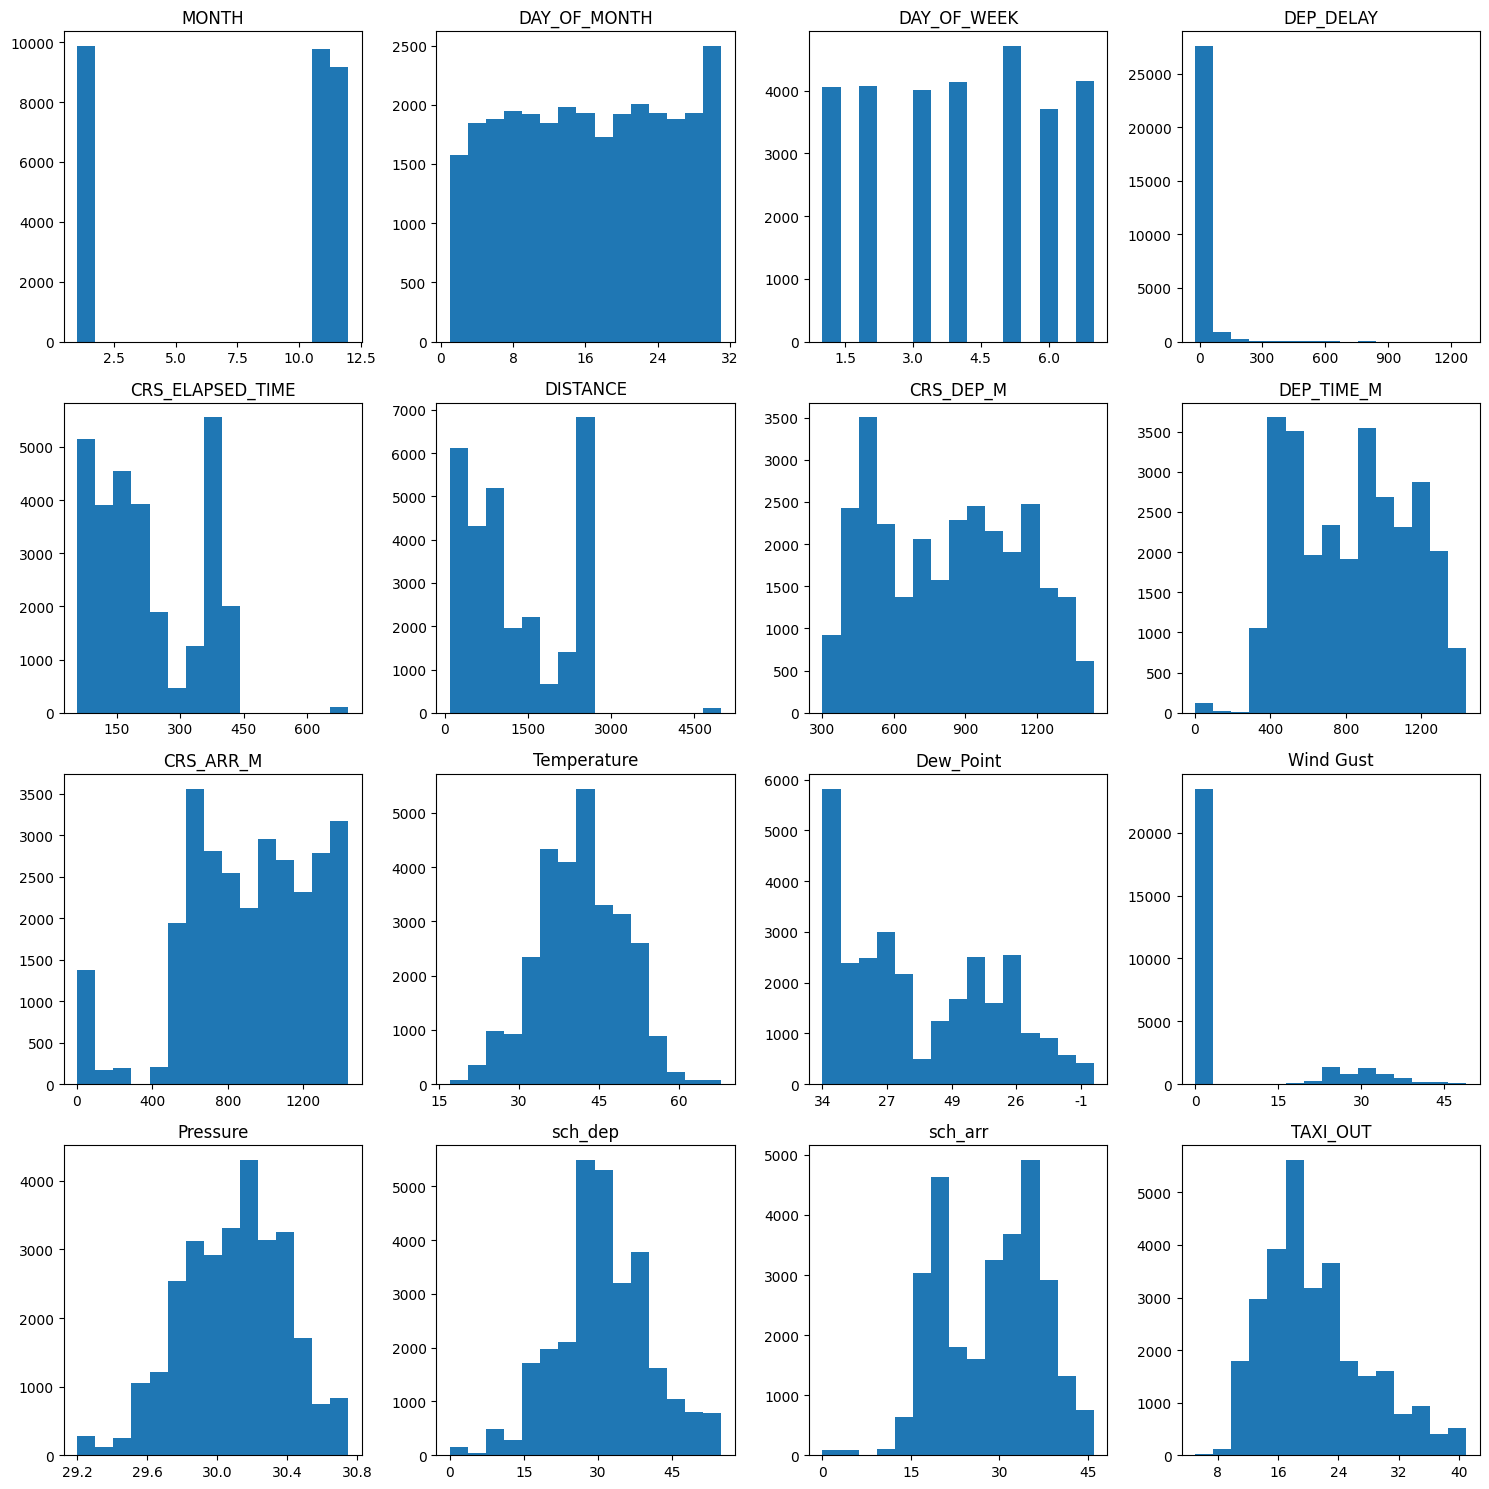

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes
# convert a 2D array of subplot axes into a 1D array
axes = axes.flatten()

# create a histogram for each column
for i, col in enumerate(numeric_columns.columns):
    ax = axes[i]
    ax.hist(numeric_columns[col], bins=15)
    ax.set_title(col)
    # change the number of ticks on the xaxis to 5
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5))


plt.tight_layout()
plt.show()

In [44]:
data_to_use = df.reindex(columns=['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew_Point', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT'])

for i, col in enumerate(data_to_use.columns):
    data_to_use[col] = data_to_use[col].astype(float)

data_types = data_to_use.dtypes
print(data_types)

MONTH               float64
DAY_OF_MONTH        float64
DAY_OF_WEEK         float64
DEP_DELAY           float64
CRS_ELAPSED_TIME    float64
DISTANCE            float64
CRS_DEP_M           float64
DEP_TIME_M          float64
CRS_ARR_M           float64
Temperature         float64
Dew_Point           float64
Wind Gust           float64
Pressure            float64
sch_dep             float64
sch_arr             float64
TAXI_OUT            float64
dtype: object


In [45]:
scaler = StandardScaler()

for i, col in enumerate(data_to_use.columns):
    data_to_use[[col]] = scaler.fit_transform(data_to_use[[col]])

data_to_use

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,0.622193,-1.716691,0.499219,-0.190398,-0.847739,-0.710364,-1.693437,-1.654145,-1.340089,0.809381,0.290663,2.731280,-0.784835,-2.322903,-1.383549,-1.000989
1,0.622193,-1.716691,0.499219,-0.345299,1.219546,1.357490,-1.639996,-1.621450,-1.099791,0.809381,0.290663,2.731280,-0.784835,-2.322903,-1.383549,-0.855042
2,0.622193,-1.716691,0.499219,0.868090,-0.370674,-0.223479,-1.770259,-1.595294,-1.241654,0.809381,0.290663,2.731280,-0.784835,-2.322903,-1.383549,0.166588
3,0.622193,-1.716691,0.499219,-0.216215,-0.479478,-0.364035,-1.623296,-1.588755,-1.151904,0.809381,0.290663,2.731280,-0.784835,-2.322903,-1.383549,-1.292883
4,0.622193,-1.716691,0.499219,-0.267849,-0.722196,-0.570932,-1.573194,-1.546252,-1.192436,0.560729,0.128244,2.478887,-0.616005,-2.322903,-1.383549,-1.146936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,-1.381158,1.711869,0.499219,-0.112948,-1.408501,-1.256844,1.800294,1.775543,1.494259,-0.309550,0.615500,-0.465691,0.295679,-1.166249,0.431794,-0.271253
28816,-1.381158,1.711869,0.499219,-0.112948,-1.257849,-1.215239,1.867096,1.840932,-2.564735,-0.309550,0.615500,-0.465691,0.295679,-1.271400,-0.657412,0.166588
28817,-1.381158,1.711869,0.499219,7.141572,1.395307,1.297895,0.981973,1.893244,1.233696,-0.309550,0.615500,-0.465691,0.295679,-1.271400,-0.657412,0.020641
28818,-1.381158,1.711869,0.499219,-0.035498,-0.010782,0.371352,1.957279,1.939017,-1.881481,-0.309550,0.615500,-0.465691,0.295679,-1.271400,-0.657412,-1.146936


In [46]:
corr_mat = data_to_use.corr(numeric_only=True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.135040,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,-0.040129,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,-0.073816,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.000013,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.007246,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.009789,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.001578,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,0.008907,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.000442,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.787864,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<Axes: >

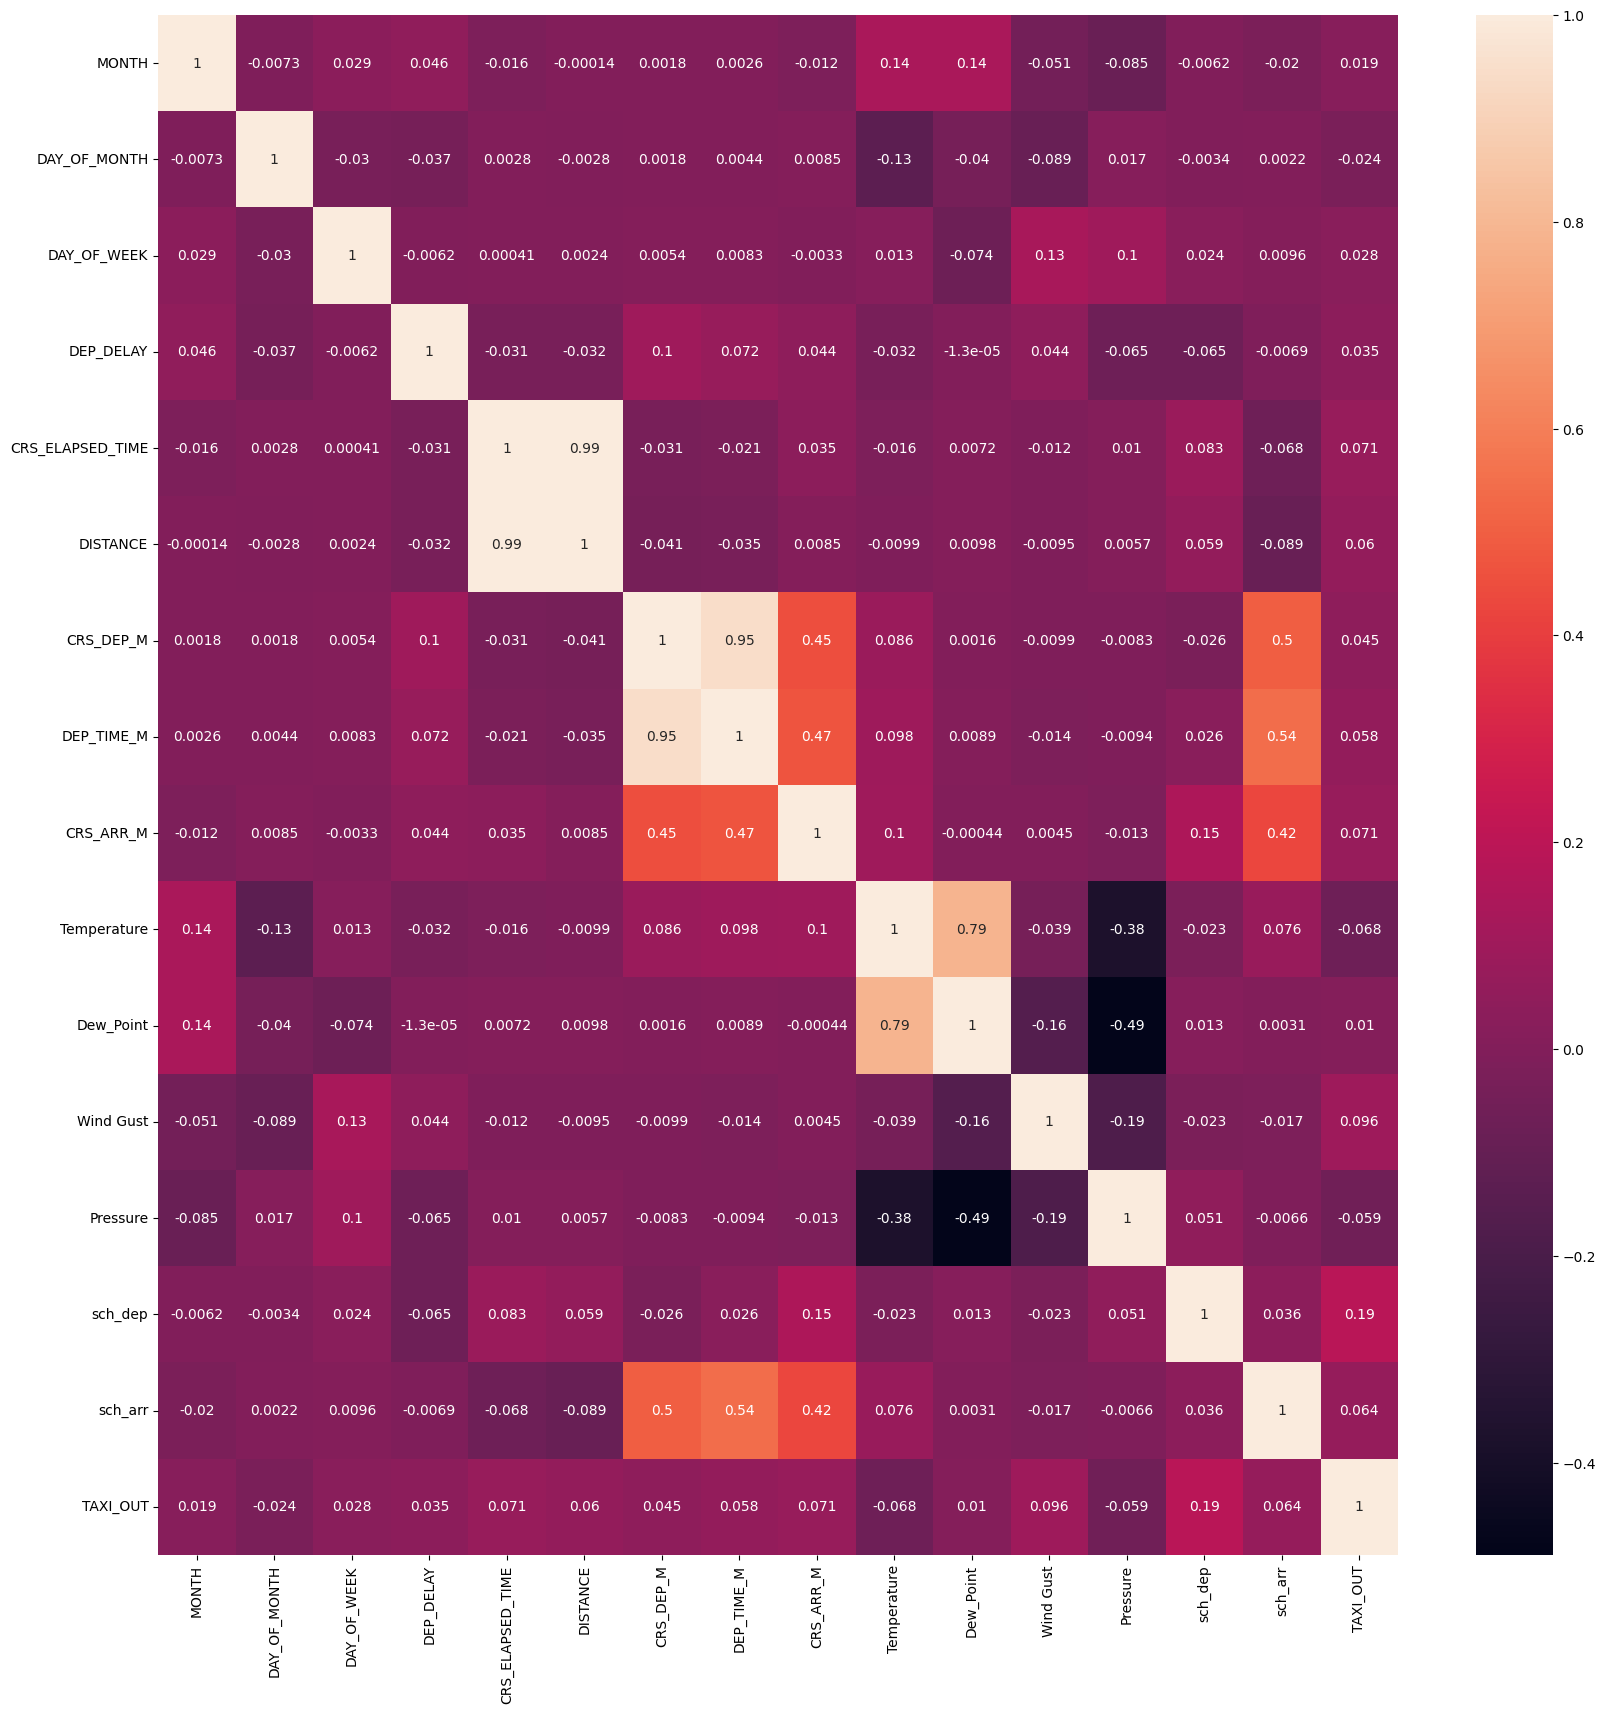

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot=True)

In [48]:
last_column = corr_mat.iloc[:, 15]
sorted_last_column = last_column.sort_values(ascending=False)

print(sorted_last_column)

TAXI_OUT            1.000000
sch_dep             0.190101
Wind Gust           0.095643
CRS_ARR_M           0.071377
CRS_ELAPSED_TIME    0.070838
sch_arr             0.064284
DISTANCE            0.059856
DEP_TIME_M          0.057896
CRS_DEP_M           0.044864
DEP_DELAY           0.034881
DAY_OF_WEEK         0.028388
MONTH               0.018505
Dew_Point           0.010216
DAY_OF_MONTH       -0.023990
Pressure           -0.059290
Temperature        -0.067574
Name: TAXI_OUT, dtype: float64


In [49]:
non_numeric_encoded_int = non_numeric_encoded.astype(int)
print(non_numeric_encoded_int)


       OP_UNIQUE_CARRIER_9E  OP_UNIQUE_CARRIER_AA  OP_UNIQUE_CARRIER_AS  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
28815                     0                     0                     0   
28816                     0                     1                     0   
28817                     0                     0                     1   
28818                     0                     0                     0   
28819                     0                     0                     0   

       OP_UNIQUE_CARRIER_B6  OP_UNIQUE_CARRIER_DL  OP_UNIQUE_CARRIER_HA  \
0                       

In [50]:
data_to_use = pd.concat([non_numeric_encoded_int, numeric_columns], axis=1)
data_to_use

,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_YX,TAIL_NUM_N101DU,...,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,0,0,0,1,0,0,0,0,0,0,...,324,323,448,48,34,38,29.86,9,17,14
1,0,0,0,1,0,0,0,0,0,0,...,340,333,531,48,34,38,29.86,9,17,15
2,0,0,0,1,0,0,0,0,0,0,...,301,341,482,48,34,38,29.86,9,17,22
3,0,0,0,1,0,0,0,0,0,0,...,345,343,513,48,34,38,29.86,9,17,12
4,0,0,0,0,1,0,0,0,0,0,...,360,356,499,46,32,35,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,0,0,0,1,0,0,0,0,0,0,...,1370,1372,1427,39,38,0,30.18,20,32,19
28816,0,1,0,0,0,0,0,0,0,0,...,1390,1392,25,39,38,0,30.18,19,23,22
28817,0,0,1,0,0,0,0,0,0,0,...,1125,1408,1337,39,38,0,30.18,19,23,21
28818,0,0,0,1,0,0,0,0,0,0,...,1417,1422,261,39,38,0,30.18,19,23,13


In [51]:
print(data_to_use)
new_csv_filename = "updated_data.csv"  # Specify the filename for the new CSV file
data_to_use.to_csv(new_csv_filename, index=False)

       OP_UNIQUE_CARRIER_9E  OP_UNIQUE_CARRIER_AA  OP_UNIQUE_CARRIER_AS  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
28815                     0                     0                     0   
28816                     0                     1                     0   
28817                     0                     0                     1   
28818                     0                     0                     0   
28819                     0                     0                     0   

       OP_UNIQUE_CARRIER_B6  OP_UNIQUE_CARRIER_DL  OP_UNIQUE_CARRIER_HA  \
0                       